   Nivo sumpor dioksida  nivo hlora  Crno/Belo vino
0                    34       0.076          Crveno
1                    67       0.098            Belo
2                    54       0.092            Belo
3                    60       0.075            Belo
4                    59       0.089            Belo
Columns: Index(['Nivo sumpor dioksida', 'nivo hlora', ' Crno/Belo vino'], dtype='object')
Novi podatak [34, 0.084] pripada klasi: Crveno


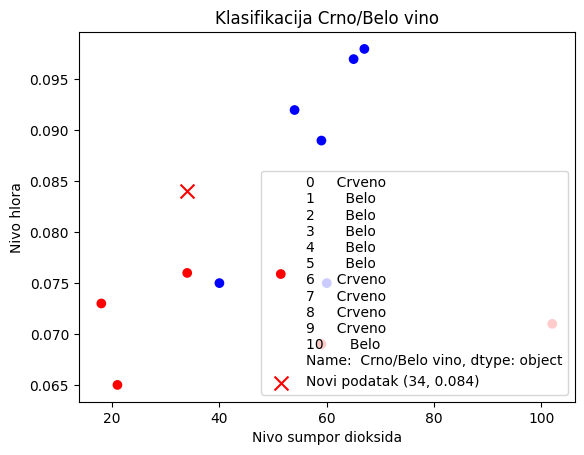

In [10]:
#knn gde je K = √n, gde je n broj podataka u skupu za treniranje naci predikciju za 34,0.084,?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

data = pd.read_csv('datasets/vino.csv')
# Prikaz prvih nekoliko redova skupa podataka
print(data.head())

new_data = [34, 0.084]
# Print the columns to check the exact column names
print("Columns:", data.columns)

# Adjust the column names here based on the actual column names in your dataset
X = data[['Nivo sumpor dioksida', 'nivo hlora']]
y = data[' Crno/Belo vino']
# Određivanje vrednosti za K
K = int(sqrt(len(data)))
def Euclidean_distance(first, second):
    return sqrt(((first[0] - second[0]) ** 2) + ((first[1] - second[1]) ** 2))

def Get_Neighbors(X, y, new_data, k):
    distance = []
    data = list(zip(X.values, y.values)) #X.values, y.values jer imamo zavisnu i nezavisnu promenljivu
    for i, target in data:
        dist = Euclidean_distance(new_data, i)
        distance.append((dist, target))
    distance.sort()
    neighbors = [target for (_, target) in distance[:k]]
    return neighbors

# Funkcija za predviđanje klase
def predict_classification(X, y, new_data, k):
    neighbors = Get_Neighbors(X, y, new_data, k)
    prediction = max(set(neighbors), key=neighbors.count)
    return prediction

# Prikaz rezultata
prediction = predict_classification(X, y, new_data, K)
print(f"Novi podatak {new_data} pripada klasi: {prediction}")

# Prikazivanje podataka i novog podatka na grafiku
colors = {'Crveno': 'red', 'Belo': 'blue'}
plt.scatter(X['Nivo sumpor dioksida'], X['nivo hlora'], c=y.map(colors), label=y)
plt.scatter(new_data[0], new_data[1], c=colors[prediction], marker='x', s=100, label=f'Novi podatak ({new_data[0]}, {new_data[1]})')
plt.xlabel('Nivo sumpor dioksida')
plt.ylabel('Nivo hlora')
plt.title('Klasifikacija Crno/Belo vino')
plt.legend()
plt.show()
